In [13]:
import pandas as pd 
import numpy as np
df = pd.read_csv("JEOPARDY_CSV.csv")
df

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [74]:
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [14]:
#For removing spaces from column names 
df.columns = df.columns.str.replace(' ', '')
print(df.columns)

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


In [76]:
import datetime
import pandas as pd
import numpy as np
import random
df["AirDate"] = pd.to_datetime(df["AirDate"])
df["AirDate"].head()

0   2004-12-31
1   2004-12-31
2   2004-12-31
3   2004-12-31
4   2004-12-31
Name: AirDate, dtype: datetime64[ns]

In [77]:
df["Value"]

0           $200 
1           $200 
2           $200 
3           $200 
4           $200 
           ...   
216925    $2,000 
216926    $2,000 
216927    $2,000 
216928    $2,000 
216929       None
Name: Value, Length: 216930, dtype: object

In [78]:
df['Value'] = df['Value'].str.replace(',','').str.replace('$','')
df['Value']

0          200 
1          200 
2          200 
3          200 
4          200 
          ...  
216925    2000 
216926    2000 
216927    2000 
216928    2000 
216929     None
Name: Value, Length: 216930, dtype: object

In [79]:
df["Value"] = pd.to_numeric(df["Value"],errors ='coerce' , downcast='integer')
df["Value"]

0          200.0
1          200.0
2          200.0
3          200.0
4          200.0
           ...  
216925    2000.0
216926    2000.0
216927    2000.0
216928    2000.0
216929       NaN
Name: Value, Length: 216930, dtype: float64

In [80]:
df.dtypes

ShowNumber             int64
AirDate       datetime64[ns]
Round                 object
Category              object
Value                float64
Question              object
Answer                object
dtype: object

In [18]:
import pandas as pd
df['Year'] = pd.DatetimeIndex(df['AirDate']).year
df.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Year
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004


How many unique shows were there each year?


In [81]:
df['Year'] = pd.DatetimeIndex(df['AirDate']).year
df.head()
group_names = df.groupby("Year")
group_names["ShowNumber"].nunique()

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: ShowNumber, dtype: int64

How many times was each category used?


In [82]:
df["Category"].value_counts()

BEFORE & AFTER             547
SCIENCE                    519
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
                          ... 
1960s HIT SONGS              1
STREISAND FILMS              1
U.S. COLLEGE TOWNS           1
SUIT UP!                     1
5-LETTER LITERARY TERMS      1
Name: Category, Length: 27983, dtype: int64

Which month (over the years) has had the most shows?

In [83]:
df["Month"] = pd.DatetimeIndex(df['AirDate']).month
df

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Year,Month
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was ...",Copernicus,2004,12
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004,12
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,The city of Yuma in this state has a record av...,Arizona,2004,12
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004,12
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004,12
...,...,...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,2000.0,This Puccini opera turns on the solution to 3 ...,Turandot,2006,5
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",2000.0,In North America this term is properly applied...,a titmouse,2006,5
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,2000.0,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,2006,5
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,2000.0,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,2006,5


In [84]:
monthly_data = df.groupby(["Year", "Month"])
ShowNumber = monthly_data["ShowNumber"].nunique()

Dict = {
    "ShowNumber" :ShowNumber
}

month_over_years = pd.DataFrame(Dict)

month_over_years.set_index = None
month_over_years

ShowNumber
Year Month            
1984 9              11
     11              4
     12              8
1985 2               1
     9               1
...                ...
2011 9              10
     10             21
     11             22
     12             22
2012 1              19

[246 rows x 1 columns]

Are there any answers that appeared multiple times? Find the questions for the top
three most common answers.


In [85]:
#answers that appeared multiple times
df['Answer'].value_counts()

China                            216
Australia                        215
Japan                            196
Chicago                          194
France                           193
                                ... 
In self-defense                    1
Tucker: The Man and His Dream      1
Larval                             1
errata                             1
serves                             1
Name: Answer, Length: 88236, dtype: int64

In [86]:
some_values = ["China" , "Australia" , "Japan"]
df.loc[df['Answer'].isin(some_values)].head(3)

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Year,Month
404,2825,1996-12-06,Double Jeopardy!,HISTORY,600.0,In February 1904 this country attacked the Rus...,Japan,1996,12
560,3036,1997-11-10,Jeopardy!,AT THE KENNEDY CENTER,500.0,A 1994 festival honoring this country featured...,Australia,1997,11
598,4107,2002-06-11,Jeopardy!,REMEMBER THE TIME,200.0,In 1958 this country launched its second 5-yea...,China,2002,6


Visualization

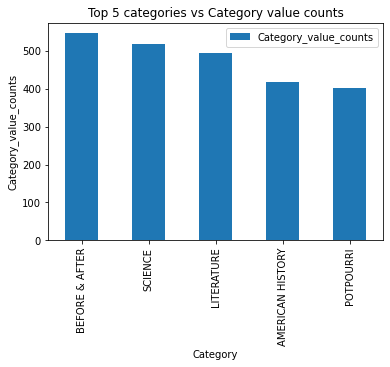

In [87]:
# Create a sample dataframe with an text index
from matplotlib import pyplot as plt
plotdata = pd.DataFrame(
    {"Category_value_counts": [547, 519, 496, 418, 401]}, 
    index=["BEFORE & AFTER","SCIENCE", "LITERATURE", "AMERICAN HISTORY", "POTPOURRI"])
# Plot a bar chart
plotdata.plot(kind="bar")
plt.title("Top 5 categories vs Category value counts")
plt.xlabel("Category")
plt.ylabel("Category_value_counts")
plt.show()

In [ ]:
# Create a sample dataframe with an text index
plotdata = pd.DataFrame(
    {"pies": [10, 10, 42, 17, 37]}, 
    index=["Dad", "Mam", "Bro", "Sis", "Me"])
# Plot a bar chart
plotdata.plot(kind="bar")

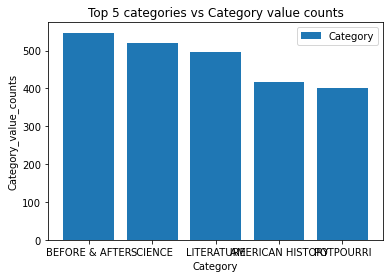

In [7]:
from matplotlib import pyplot as plt
Category_value_counts = [547, 519, 496, 418, 401]
index= ["BEFORE & AFTER","SCIENCE", "LITERATURE", "AMERICAN HISTORY", "POTPOURRI"]
# Plot a bar chart
plt.bar(index, Category_value_counts )
plt.title("Top 5 categories vs Category value counts")
plt.xlabel("Category")
plt.ylabel("Category_value_counts")
plt.legend(["Category" ,"Category_value_counts"])
plt.show()

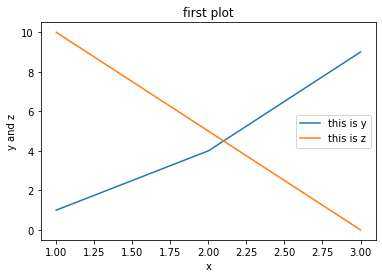

In [10]:
x= [1,2,3]
y = [1,4,9]
z=[10,5,0]
plt.plot(x,y)
plt.plot(x,z)

plt.title("first plot")
plt.xlabel("x")
plt.ylabel("y and z")
plt.legend(["this is y" , "this is z"])
plt.show()